# Census Income Project

To predict whether a person makes over 50k a year

# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
%matplotlib inline

# Load The Data

In [ ]:
df = pd.read_csv("census_income.csv")
df.head(10)


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Exploratory Data Analysis

The data contains 32,560 rows and 15 columns (including the target/ output column (income) ).
The data type is a mix of categorical and numeric data. We notice that there are no null values.

In [ ]:
df.shape


(32560, 15)

In [ ]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [ ]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [ ]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Checking the unique value for each column.

In [ ]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The columns/ features which have the ” ?” sign are : Workclass, Occupation and Native Country. Let’s explore a more in depth. I am using Value_Counts function to
    find out the count of values for every feature.

# Value Count Function

In [ ]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [ ]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [ ]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [ ]:
df['Education'].value_counts()


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [ ]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [ ]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [ ]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

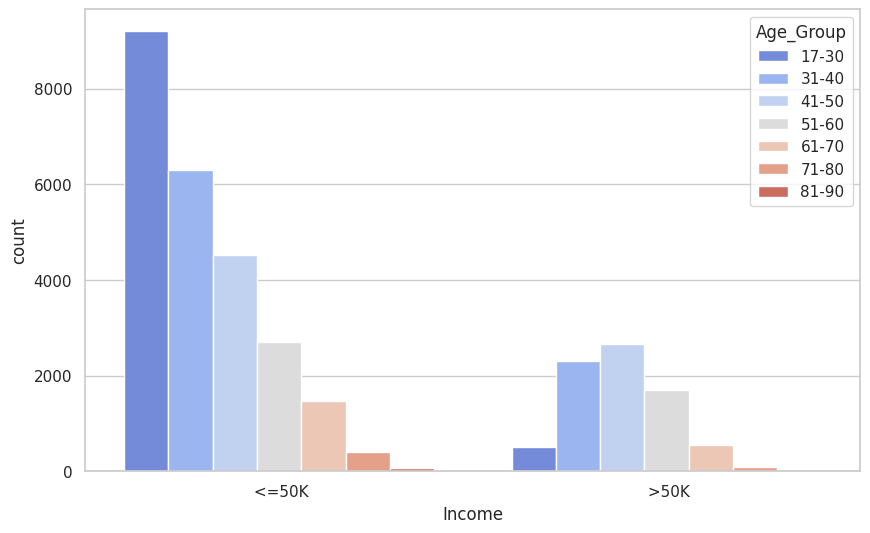

In [ ]:
# Create age groups
age_bins = [17, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['17-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Set the style
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot Income vs Age Group
sns.countplot(x='Income', palette='coolwarm', hue='Age_Group', data=df)

# Show the plot
plt.show()

<Axes: xlabel='Income', ylabel='count'>

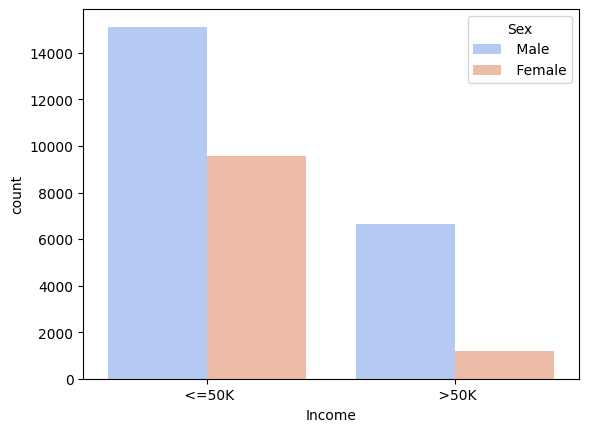

In [ ]:
# Plot Income vs Sex

sns.countplot(x='Income', palette='coolwarm', hue='Sex', data=df)

<Axes: xlabel='Income', ylabel='count'>

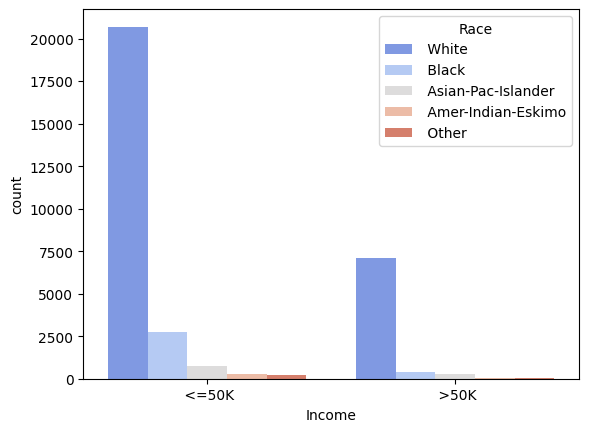

In [ ]:
# Plot Income vs Race

sns.countplot(x='Income', palette='coolwarm', hue='Race', data=df)


<Axes: xlabel='Income', ylabel='count'>

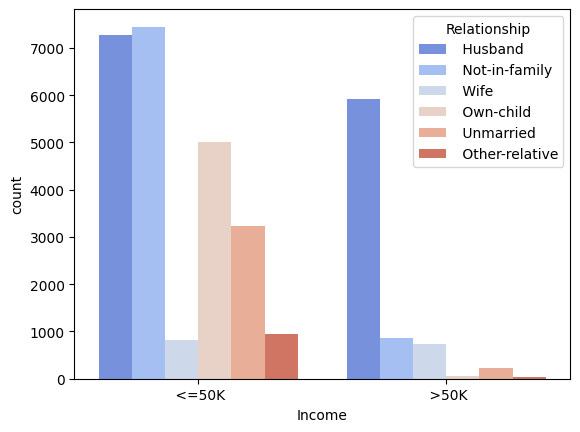

In [ ]:
# Plot Income vs Relationship

sns.countplot(x='Income', palette='coolwarm', hue='Relationship', data=df)

<Axes: xlabel='Income', ylabel='count'>

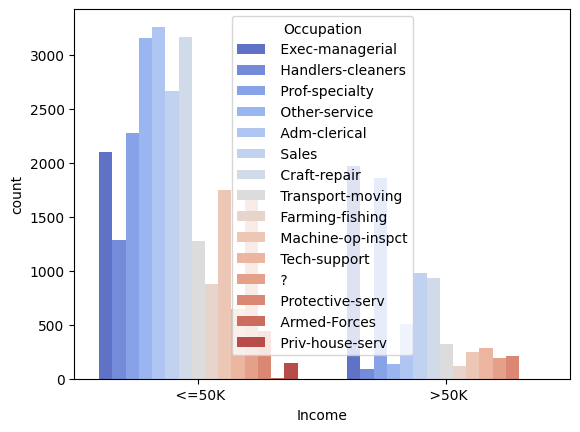

In [ ]:
# Plot Income vs Occupation

sns.countplot(x='Income', palette='coolwarm', hue='Occupation', data=df)

<Axes: xlabel='Income', ylabel='count'>

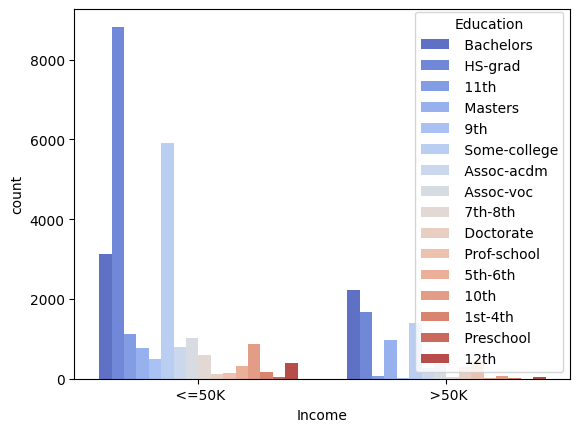

In [ ]:
# Plot Income vs Education

sns.countplot(x='Income', palette='coolwarm', hue='Education', data=df)

#Handle Missing Data

In [ ]:
#Replace the ? values with mode
df['Workclass']=df['Workclass'].replace('?','Private')
df['Occupation']=df['Occupation'].replace('?','Prof-specialty')
df['Native_country']=df['Native_country'].replace('?','United-States')

In [ ]:
df.head(10)


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Age_Group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,51-60
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,17-30
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,31-40
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,41-50
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,51-60
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,31-40
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,41-50
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,31-40


In [ ]:
df = df.rename(columns={'Education':'education'})
df


,Age,Workclass,Fnlwgt,education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Age_Group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,51-60
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,17-30
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,17-30
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,41-50
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,51-60
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,17-30


In [ ]:
df.education=df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School')
df.education=df.education.replace('HS-grad','High school')
df.education=df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'Higher')
df.education=df.education.replace('Bachelors','Undergrad')
df.education=df.education.replace('Masters','Grad')
df.education=df.education.replace('Doctorate','Doc')


In [ ]:
df.education


0          Bachelors
1            HS-grad
2               11th
3          Bachelors
4            Masters
            ...     
32555     Assoc-acdm
32556        HS-grad
32557        HS-grad
32558        HS-grad
32559        HS-grad
Name: education, Length: 32560, dtype: object

In [ ]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [ ]:
df.Marital_status=df.Marital_status.replace(['Married-civ-spouse','Married-af-spouse'],'Married')
df.Marital_status=df.Marital_status.replace(['Never-Married'],'Not-Married')
df.Marital_status=df.Marital_status.replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'Others')





In [ ]:
df.Marital_status



0         Married-civ-spouse
1                   Divorced
2         Married-civ-spouse
3         Married-civ-spouse
4         Married-civ-spouse
                ...         
32555     Married-civ-spouse
32556     Married-civ-spouse
32557                Widowed
32558          Never-married
32559     Married-civ-spouse
Name: Marital_status, Length: 32560, dtype: object

In [ ]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [ ]:
df['Income']=df['Income'].replace('<=50k',0)
df['Income']=df['Income'].replace('>50k',1)


In [ ]:
df['Income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32560, dtype: object

In [ ]:
df.head()

,Age,Workclass,Fnlwgt,education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Age_Group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,51-60
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,17-30
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,31-40


In [ ]:
df.corr()

<ipython-input-57-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


# DATA VISUALIZATION


Now, let I come to a more interesting part :

I will look into the

Histogram to study the shape of the numeric data

BoxPlot to have an idea of outliers

Correlation plot to study the correlation among the numeric variables


Countplot for the income variable



<ipython-input-58-db93604bff16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


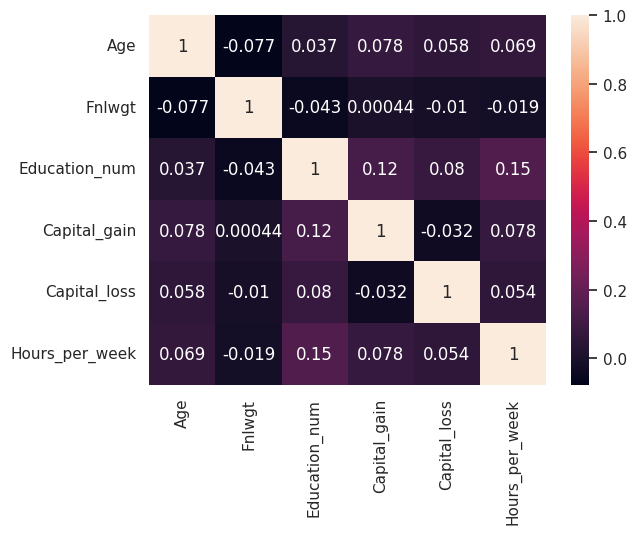

In [ ]:
sns.heatmap(df.corr(),annot=True);


Histogram

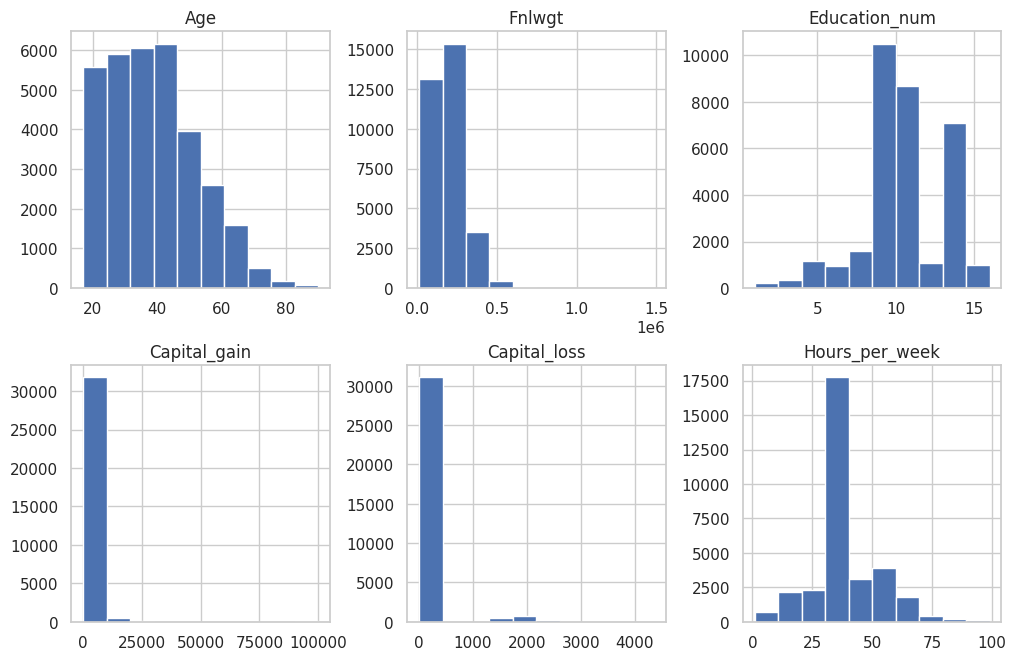

In [ ]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False);

Boxplot

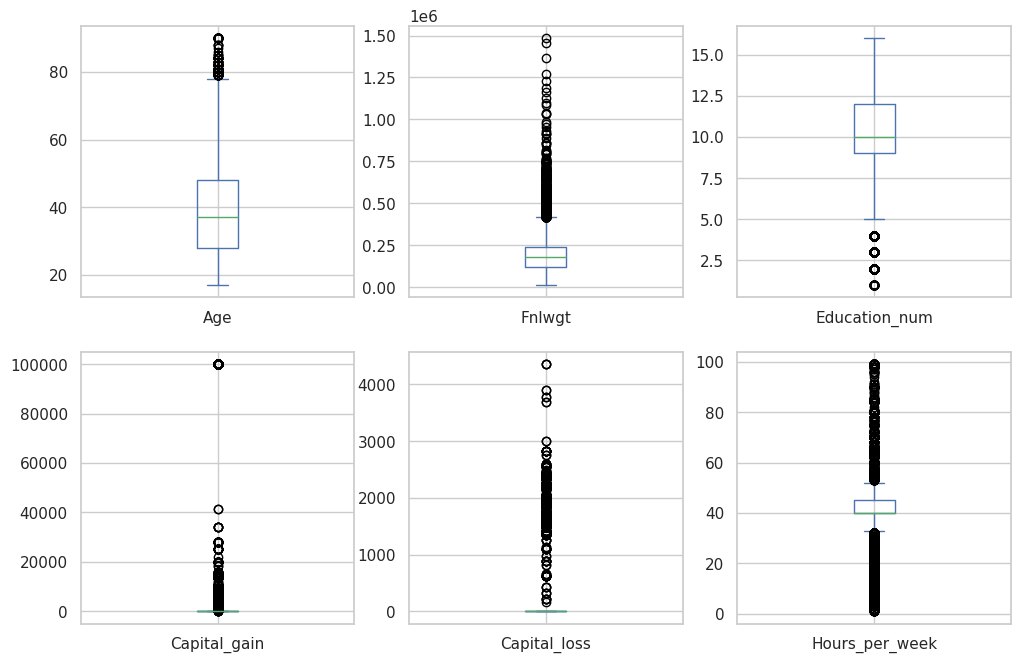

In [ ]:
df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

In [ ]:
sns.countplot(df['Race'],hue='Income',data=df,palette='magma');

TypeError: ignored

In [ ]:
sns.countplot(df['Occupation'],hue='Income',data=df,palette='magma');


In [ ]:
sns.countplot(df['education'],hue='Income',data=df,palette='seismic');

In [ ]:
sns.countplot(df['Income'],hue='Sex',data=df,palette='husl');

In [ ]:
sns.countplot(y='Workclass', hue='Income', data = df)


In [ ]:
sns.countplot(y='Occupation', hue='Income', data = df)


In [ ]:
fig=px.scatter(df,x='Capital_gain',y='Hours_per_week',color='Sex',title="Scatter Plot Capital_gain And Hours_per_week As per Gender/Sex")

fig.show()



there are no relation between them.

In [ ]:
fig=px.pie(df,values='Hours_per_week',names='Occupation',color_discrete_sequence=px.colors.sequential.RdBu,title="Pie Chart Showing Occupation And Hours_per_week")

fig.show()


# Key Findings

->The minimum age is 17 and the maximum is 90 years, most of the working age group lies between 20-40

->The minimum hours-per-week is 1 and maximum is 90, with most of the count lying between 30-40

->outliers observed in almost all the numeric features, these are the extreme values that are present in the data.

->Not very strong correlation observed among variables

# Training the MODEL and Making Predictions

->Create X and y object to store the independent variable (X) and dependent variable(y).

->Perform Standard Scaling to scale the data

->Label Encoding is performed to convert the categorical data into numeric format

->Label Encoder makes the data suitable for machine

->Perform fit and Transform

->Split the dataset into train and test split

# Model Building

In [ ]:
x=df.drop(['Income'],axis=1)
y=df['Income']

# Feature Scalling

In [ ]:
df1=df.copy()
df1=df1.apply(LabelEncoder().fit_transform)
df1.head()


,Age,Workclass,Fnlwgt,education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Age_Group
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0,3
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0,1
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0,3
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0,1


In [ ]:
ss=StandardScaler().fit(df1.drop('Income',axis=1))


In [ ]:
x=ss.transform(df1.drop('Income',axis=1))
y=df['Income']


# Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

# Logistic Regression


In [ ]:
lr=LogisticRegression()

model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)

print("ACC on training data:{:,.3f}".format(lr.score(x_train,y_train)))
print("ACC on test data:{:,.3f}".format(lr.score(x_test,y_test)))


ACC on training data:0.824
ACC on test data:0.826


# Random Forest Classifier

In [ ]:
rfc=RandomForestClassifier()

model1=rfc.fit(x_train,y_train)
prediction1=model1.predict(x_test)

print("ACC on training data:{:,.3f}".format(rfc.score(x_train,y_train)))
print("ACC on test data:{:,.3f}".format(rfc.score(x_test,y_test)))



ACC on training data:1.000
ACC on test data:0.862


In [ ]:
print(confusion_matrix(y_test,prediction1))

[[6938  474]
 [ 878 1478]]


In [ ]:
print(classification_report(y_test,prediction1))


              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      7412
        >50K       0.76      0.63      0.69      2356

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768



# Key Findings


Random Forest Classifier is giving the best accuracy on test data: 86%

Logistic Regression Classifier accuracy is: 82%

# so we will use randaom forest  for this model bulding

In [ ]:
# save the model
# now save the model
pickle.dump(rfc,open('cla_powerplant','wb'))